In [162]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable
import math
from wordcloud import WordCloud

plt.rcParams["figure.figsize"] = (10,8)
sns.set_palette("husl", 9)

In [163]:
df = pd.read_csv("Archivos/profesionales_nonull.csv", index_col= 0)

---

### Análisis de variables genéricas (puestos de trabajo, salario, edad)

---


In [164]:
def limpiar(col):
    try:
        return col.replace("+","").split("-")[0]
    except:
        return col

In [165]:
#Creamos una nueva columna edad_num con la columna edad en tipo numérico
df["edad_num"] = df["edad"].apply(limpiar).astype("float64", errors= "raise")

In [166]:
def truncar(col):
    return math.trunc(col)

In [167]:
# Quitamos los decimales de la columna salario
df["salario"] = df['salario'].apply(truncar).astype("float64", errors= "raise")

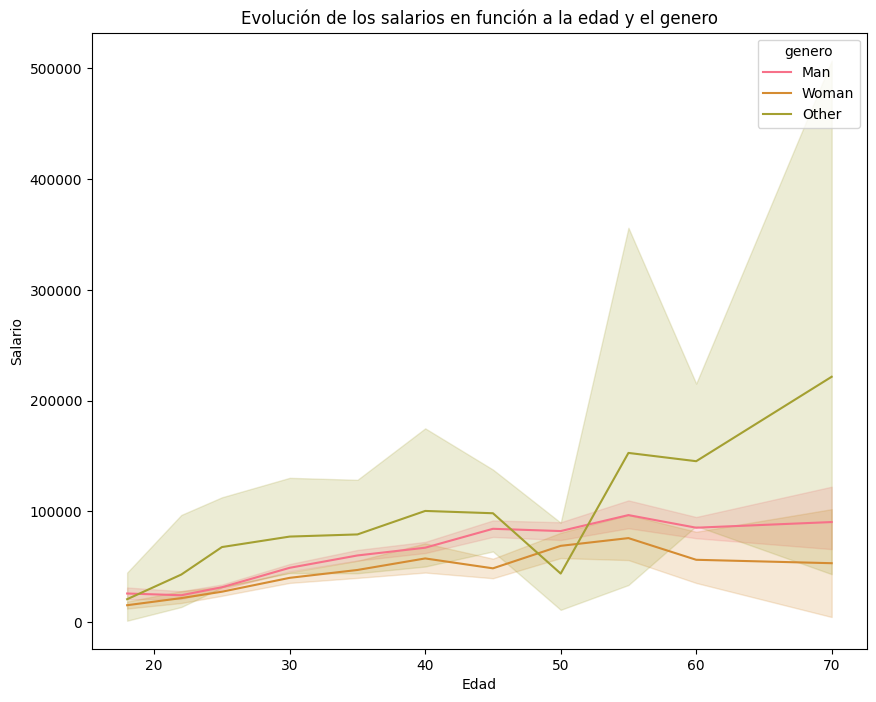

In [168]:
fig = sns.lineplot(x='edad_num', y = 'salario', data = df, hue = 'genero')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero');

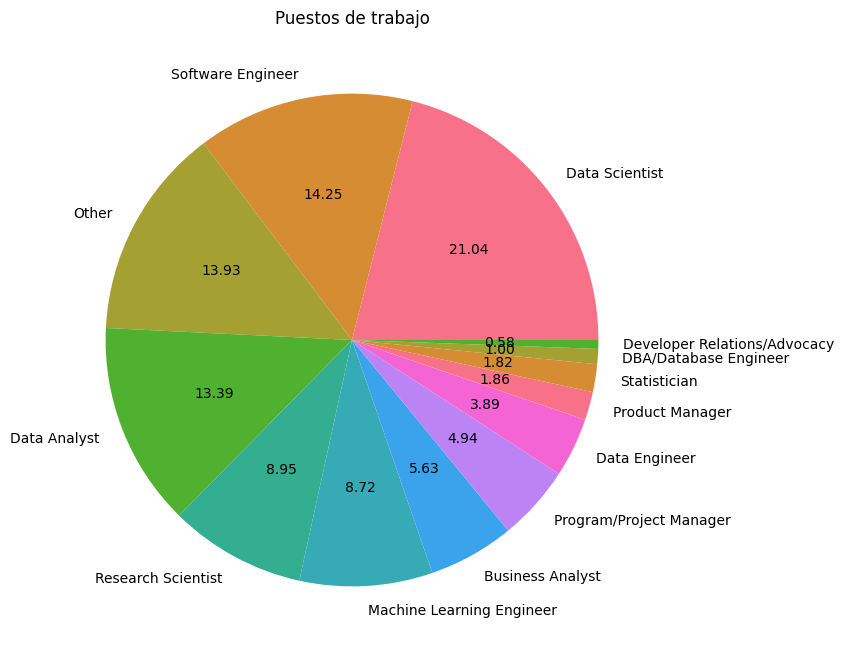

In [169]:
df_pieplot = df['puesto_trabajo'].value_counts().reset_index()
plt.figure()
plt.pie(df_pieplot['puesto_trabajo'], labels= df_pieplot["index"], autopct= '%.2f')
plt.title("Puestos de trabajo")
plt.show()

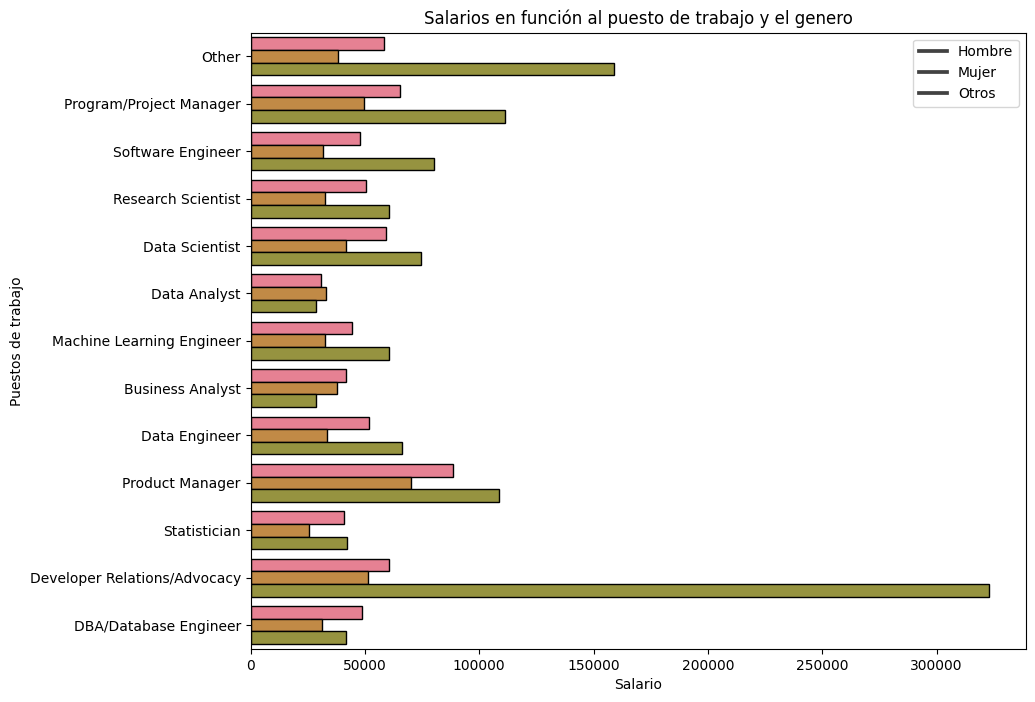

In [170]:
fig = sns.barplot(y='puesto_trabajo', x = 'salario', data = df, hue='genero', errorbar=('ci',0), edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Salario', ylabel = 'Puestos de trabajo')
plt.legend(labels = ['Hombre', 'Mujer', 'Otros'])
# ponemos título a la gráfica
fig.set_title('Salarios en función al puesto de trabajo y el genero');

In [171]:
#Filtramos df para quitar los datos de género = other
df_grafica =df[ df['genero'] != 'Other']

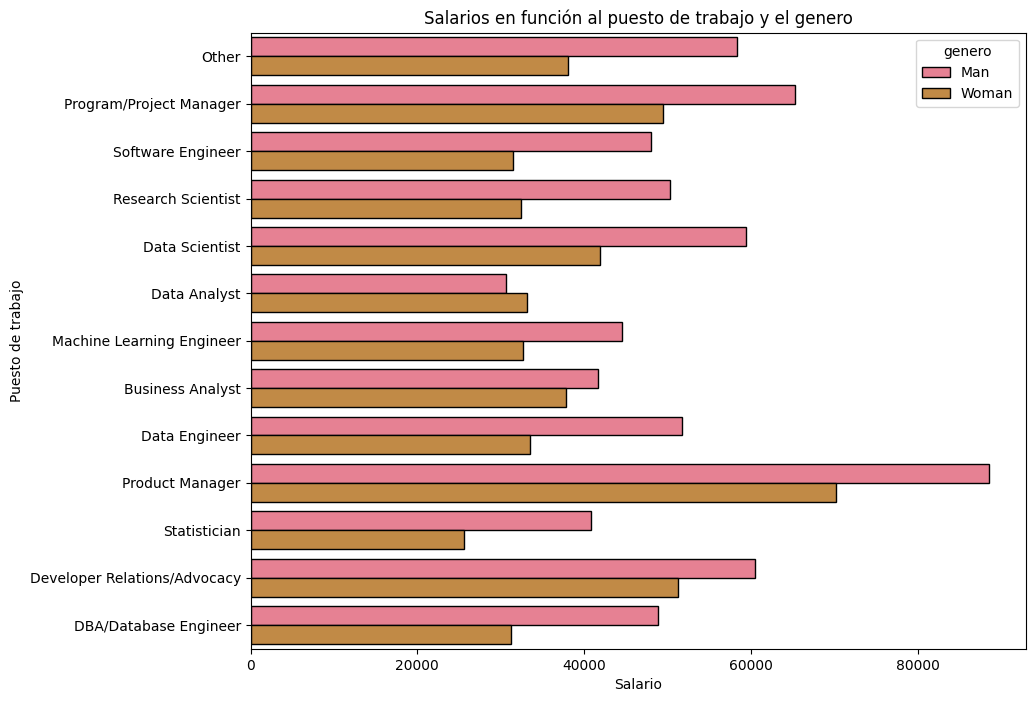

In [172]:
fig = sns.barplot(y='puesto_trabajo', x = 'salario', data = df_grafica, hue='genero', errorbar=('ci',0), edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Salario', ylabel = 'Puesto de trabajo')
# ponemos título a la gráfica
fig.set_title('Salarios en función al puesto de trabajo y el genero');

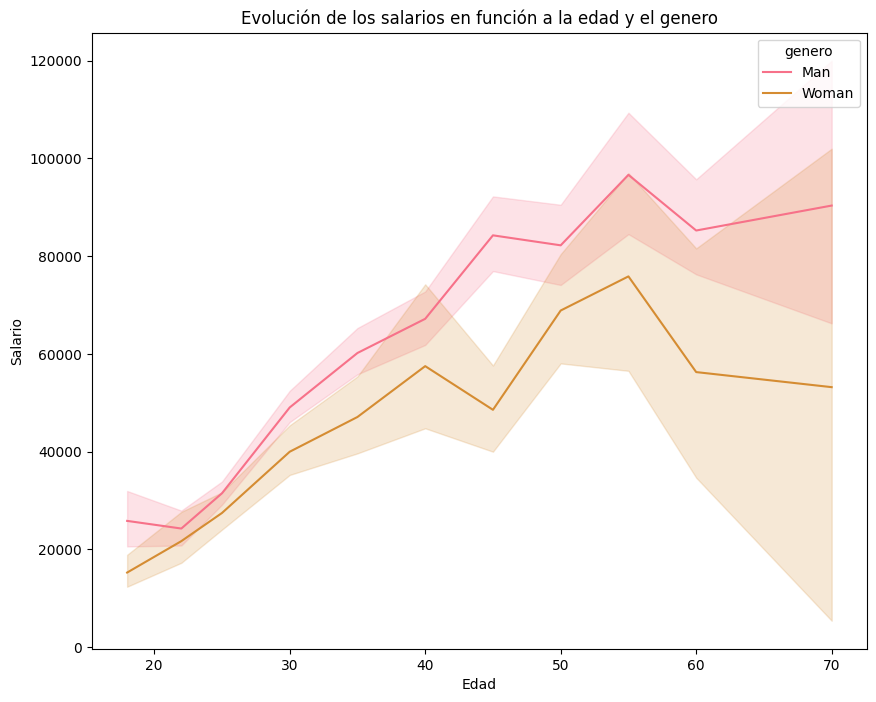

In [173]:
fig = sns.lineplot(x='edad_num', y = 'salario', data = df_grafica, hue = 'genero')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero');

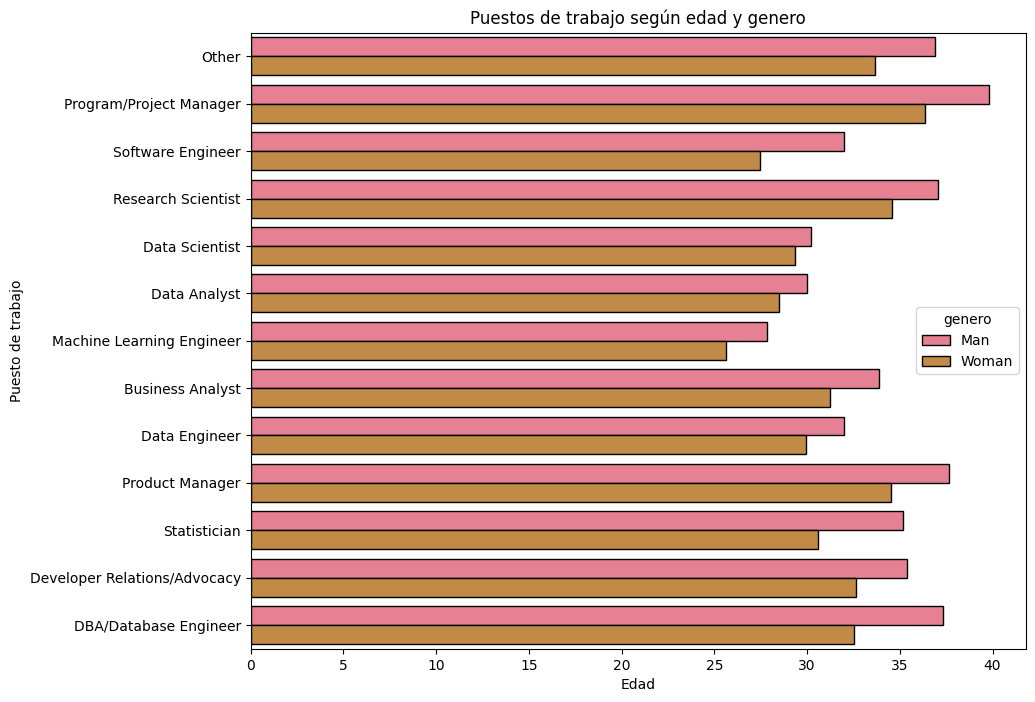

In [174]:
fig = sns.barplot(y='puesto_trabajo', x = 'edad_num', data = df_grafica, hue='genero', errorbar=('ci',0), edgecolor ='black')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Puesto de trabajo')
# ponemos título a la gráfica
fig.set_title('Puestos de trabajo según edad y genero');

---

### Donde se comparte publicamente el trabajo

---

In [175]:
def data_pregunta(dataf, colum):  # funcion para hacer df con la columna que queremos separar
    df = dataf[["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario",colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [176]:
df_plataforma =data_pregunta(df,'q39_plat_compartir_trabajo')
lista_plataformas = df_plataforma['q39_plat_compartir_trabajo'].value_counts()[:4].index.tolist()
df_plat_mas = df_plataforma.loc[df_plataforma['q39_plat_compartir_trabajo'].isin(lista_plataformas)]

/tmp/ipykernel_2966/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


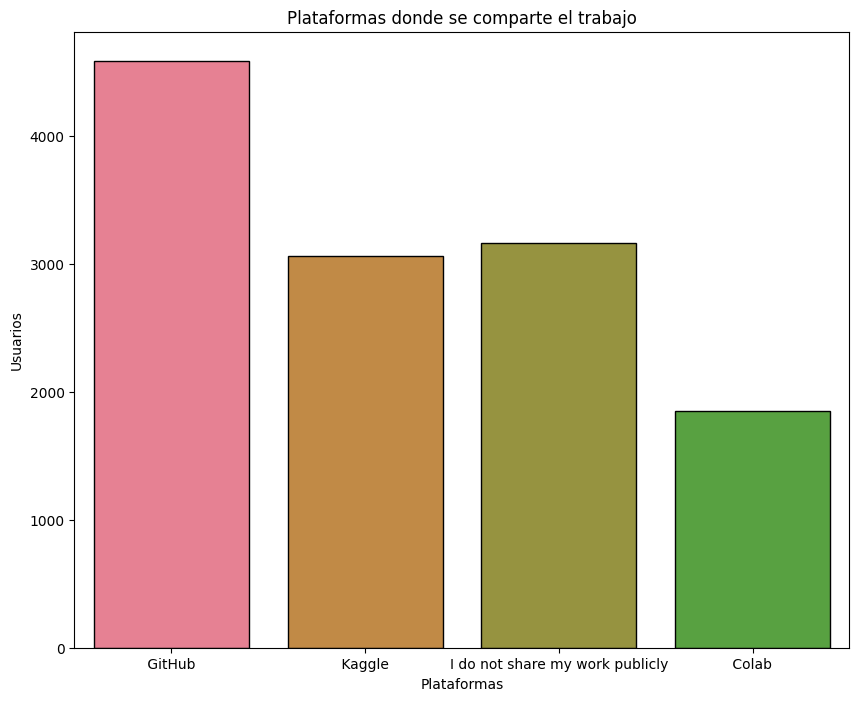

In [177]:
#Gráfica de Plataformas donde se comparte públicamente el trabajo
plt.figure(figsize=(10,8))
fig = sns.countplot(x = 'q39_plat_compartir_trabajo', data = df_plat_mas, edgecolor ='black')
fig.set(xlabel='Plataformas', ylabel = 'Usuarios')
plt.title(label = "Plataformas donde se comparte el trabajo")
plt.show()

---

### Donde se hacen cursos

---

In [178]:
df_cursos =data_pregunta(df,'q40_plat_cursos')
lista_columnas=["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario"]
lista_cursos = df_cursos['q40_plat_cursos'].value_counts()[:4].index.tolist()
df_cursos_mas = df_cursos.loc[df_cursos['q40_plat_cursos'].isin(lista_cursos)]

/tmp/ipykernel_2966/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


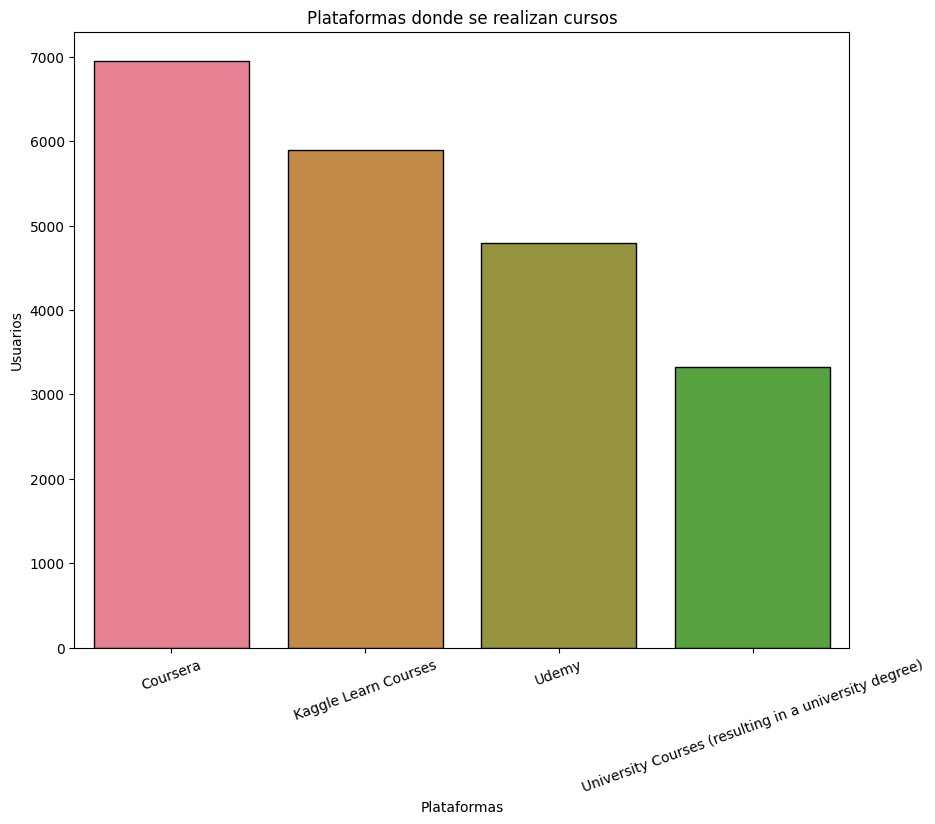

In [179]:
#Gráfica de Plataformas donde se hacen cursos
plt.figure(figsize=(10,8))
fig = sns.countplot(x = 'q40_plat_cursos', data =df_cursos_mas, edgecolor ='black')
fig.set(xlabel='Plataformas', ylabel = 'Usuarios')
plt.xticks(rotation = 20)
plt.title(label = "Plataformas donde se realizan cursos")
plt.show()

---

## Preguntas específicas

---

In [180]:
# Función para separar la columna con la que queremos trabajar, y dividir los datos en filas
def data_pregunta(dataf, colum):
    df = dataf[["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario",colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [181]:
# Lista para usar en el hue de las gráficas y poder hacer un for loop con la visualización
columnas_hue = ["edad", "genero", "estudios", "puesto_trabajo", "experiencia"]

---
### PRINCIPALES HERRAMIENTAS DE TRABAJO
---

Realizamos una serie de gráficas para visualizar las respuestas dadas a la pregunta: Qué librerias de visualización sueles usar?

In [182]:
# Creamos un DF ejecutando la función data_pregunta
df_visualizacion = data_pregunta(df, "herramientas_visualizacion")

/tmp/ipykernel_2966/4110717473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [183]:
df_visualizacion.head()

,edad,genero,pais,estudios,puesto_trabajo,experiencia,salario,herramientas_visualizacion
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Matplotlib
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Seaborn
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Ggplot / ggplot2
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Shiny
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Leaflet / Folium


In [184]:
# Creamos una lista para ordenar la gráfica por cantidad de votos
lista_ordenada = df_visualizacion["herramientas_visualizacion"].value_counts().index.tolist()

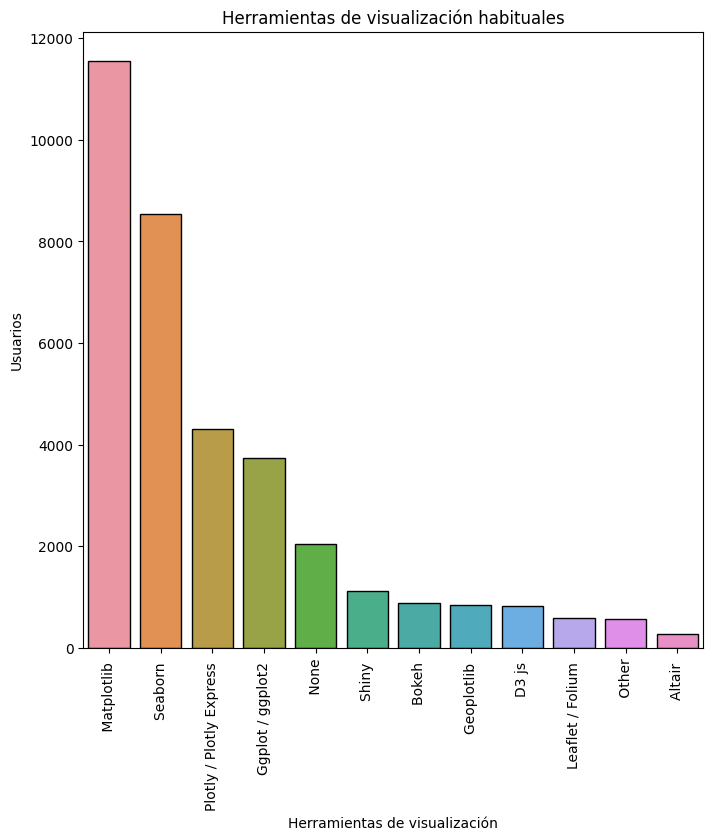

In [185]:
# Realizamos un countplot para visualizar las librerias de visualización más usadas
plt.figure(figsize =(8,8))
fig = sns.countplot(x= "herramientas_visualizacion", data= df_visualizacion, order= lista_ordenada, edgecolor ='black')
plt.title(label = "Herramientas de visualización habituales")
fig.set(xlabel='Herramientas de visualización', ylabel = 'Usuarios')
plt.xticks(rotation = 90)
plt.show()

Podemos ver que las librerías más usadas son Matplotlib y Seaborn, seguidas de lejos por Plotly y Ggplot.

In [186]:
# Sacamos una lista con las 4 librerías más usadas
list_herr = df_visualizacion["herramientas_visualizacion"].value_counts()[:4].index.tolist()

In [187]:
list_herr

[' Matplotlib ', 'Seaborn ', 'Plotly / Plotly Express ', 'Ggplot / ggplot2 ']

In [188]:
# Creamos un df filtrando por la lista con las librerías más habituales
df_herramientas = df_visualizacion.loc[df_visualizacion["herramientas_visualizacion"].isin(list_herr)]

In [189]:
df_herramientas.herramientas_visualizacion.value_counts()

 Matplotlib                 11551
Seaborn                      8535
Plotly / Plotly Express      4312
Ggplot / ggplot2             3745
Name: herramientas_visualizacion, dtype: int64

In [190]:
prueba = pd.DataFrame(df_herramientas.groupby(["edad"])["herramientas_visualizacion"].count())

In [191]:
prueba.sort_values(by= ["herramientas_visualizacion"], ascending= False)

,herramientas_visualizacion
edad,
25-29,6257
30-34,4877
22-24,4256
35-39,3578
40-44,2678
45-49,1917
18-21,1734
50-54,1245
55-59,792


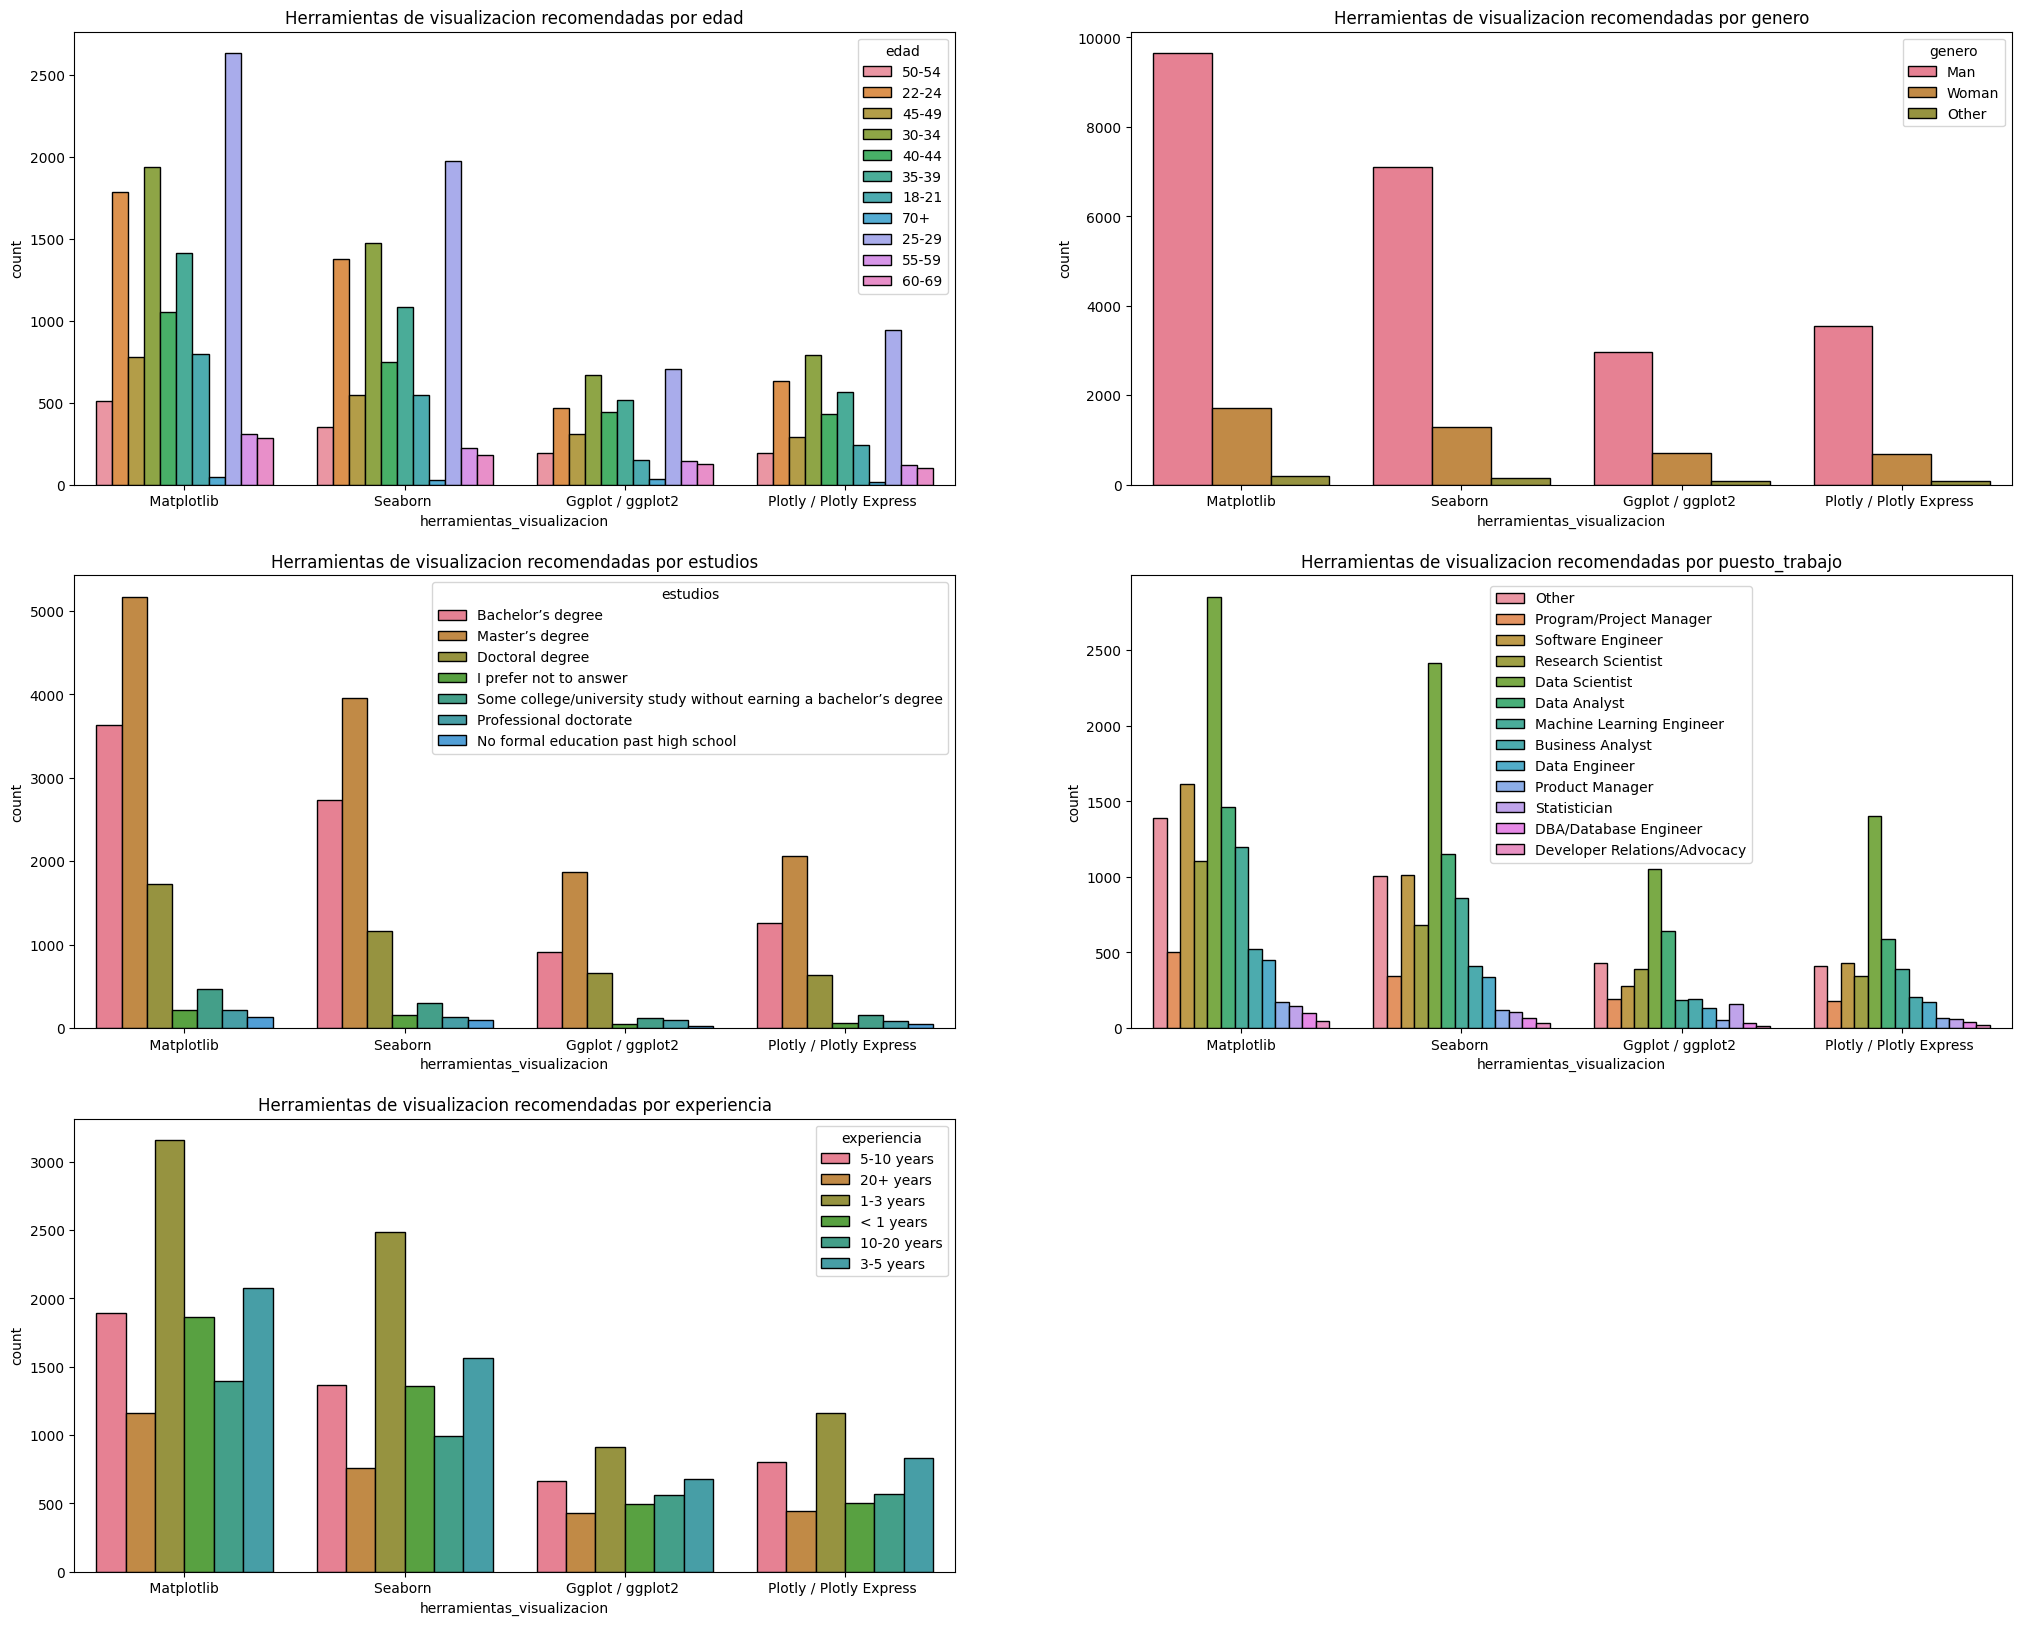

In [192]:
# Creamos un subplot con las gráficas de las herramientas de visualización por edad, genero, estudios, puesto de trabajo y experiencia
fig, axes = plt.subplots(3,2, figsize= (25,20))
axes = axes.flat
for indice, columna in enumerate(columnas_hue):
    sns.countplot(data = df_herramientas, x = "herramientas_visualizacion", hue= columna, ax = axes[indice], edgecolor ='black')
    axes[indice].set_title(f"Herramientas de visualizacion recomendadas por {columna}")
axes[3].legend(bbox_to_anchor = (0.4,0.35))
fig.delaxes(axes[-1])
plt.show()

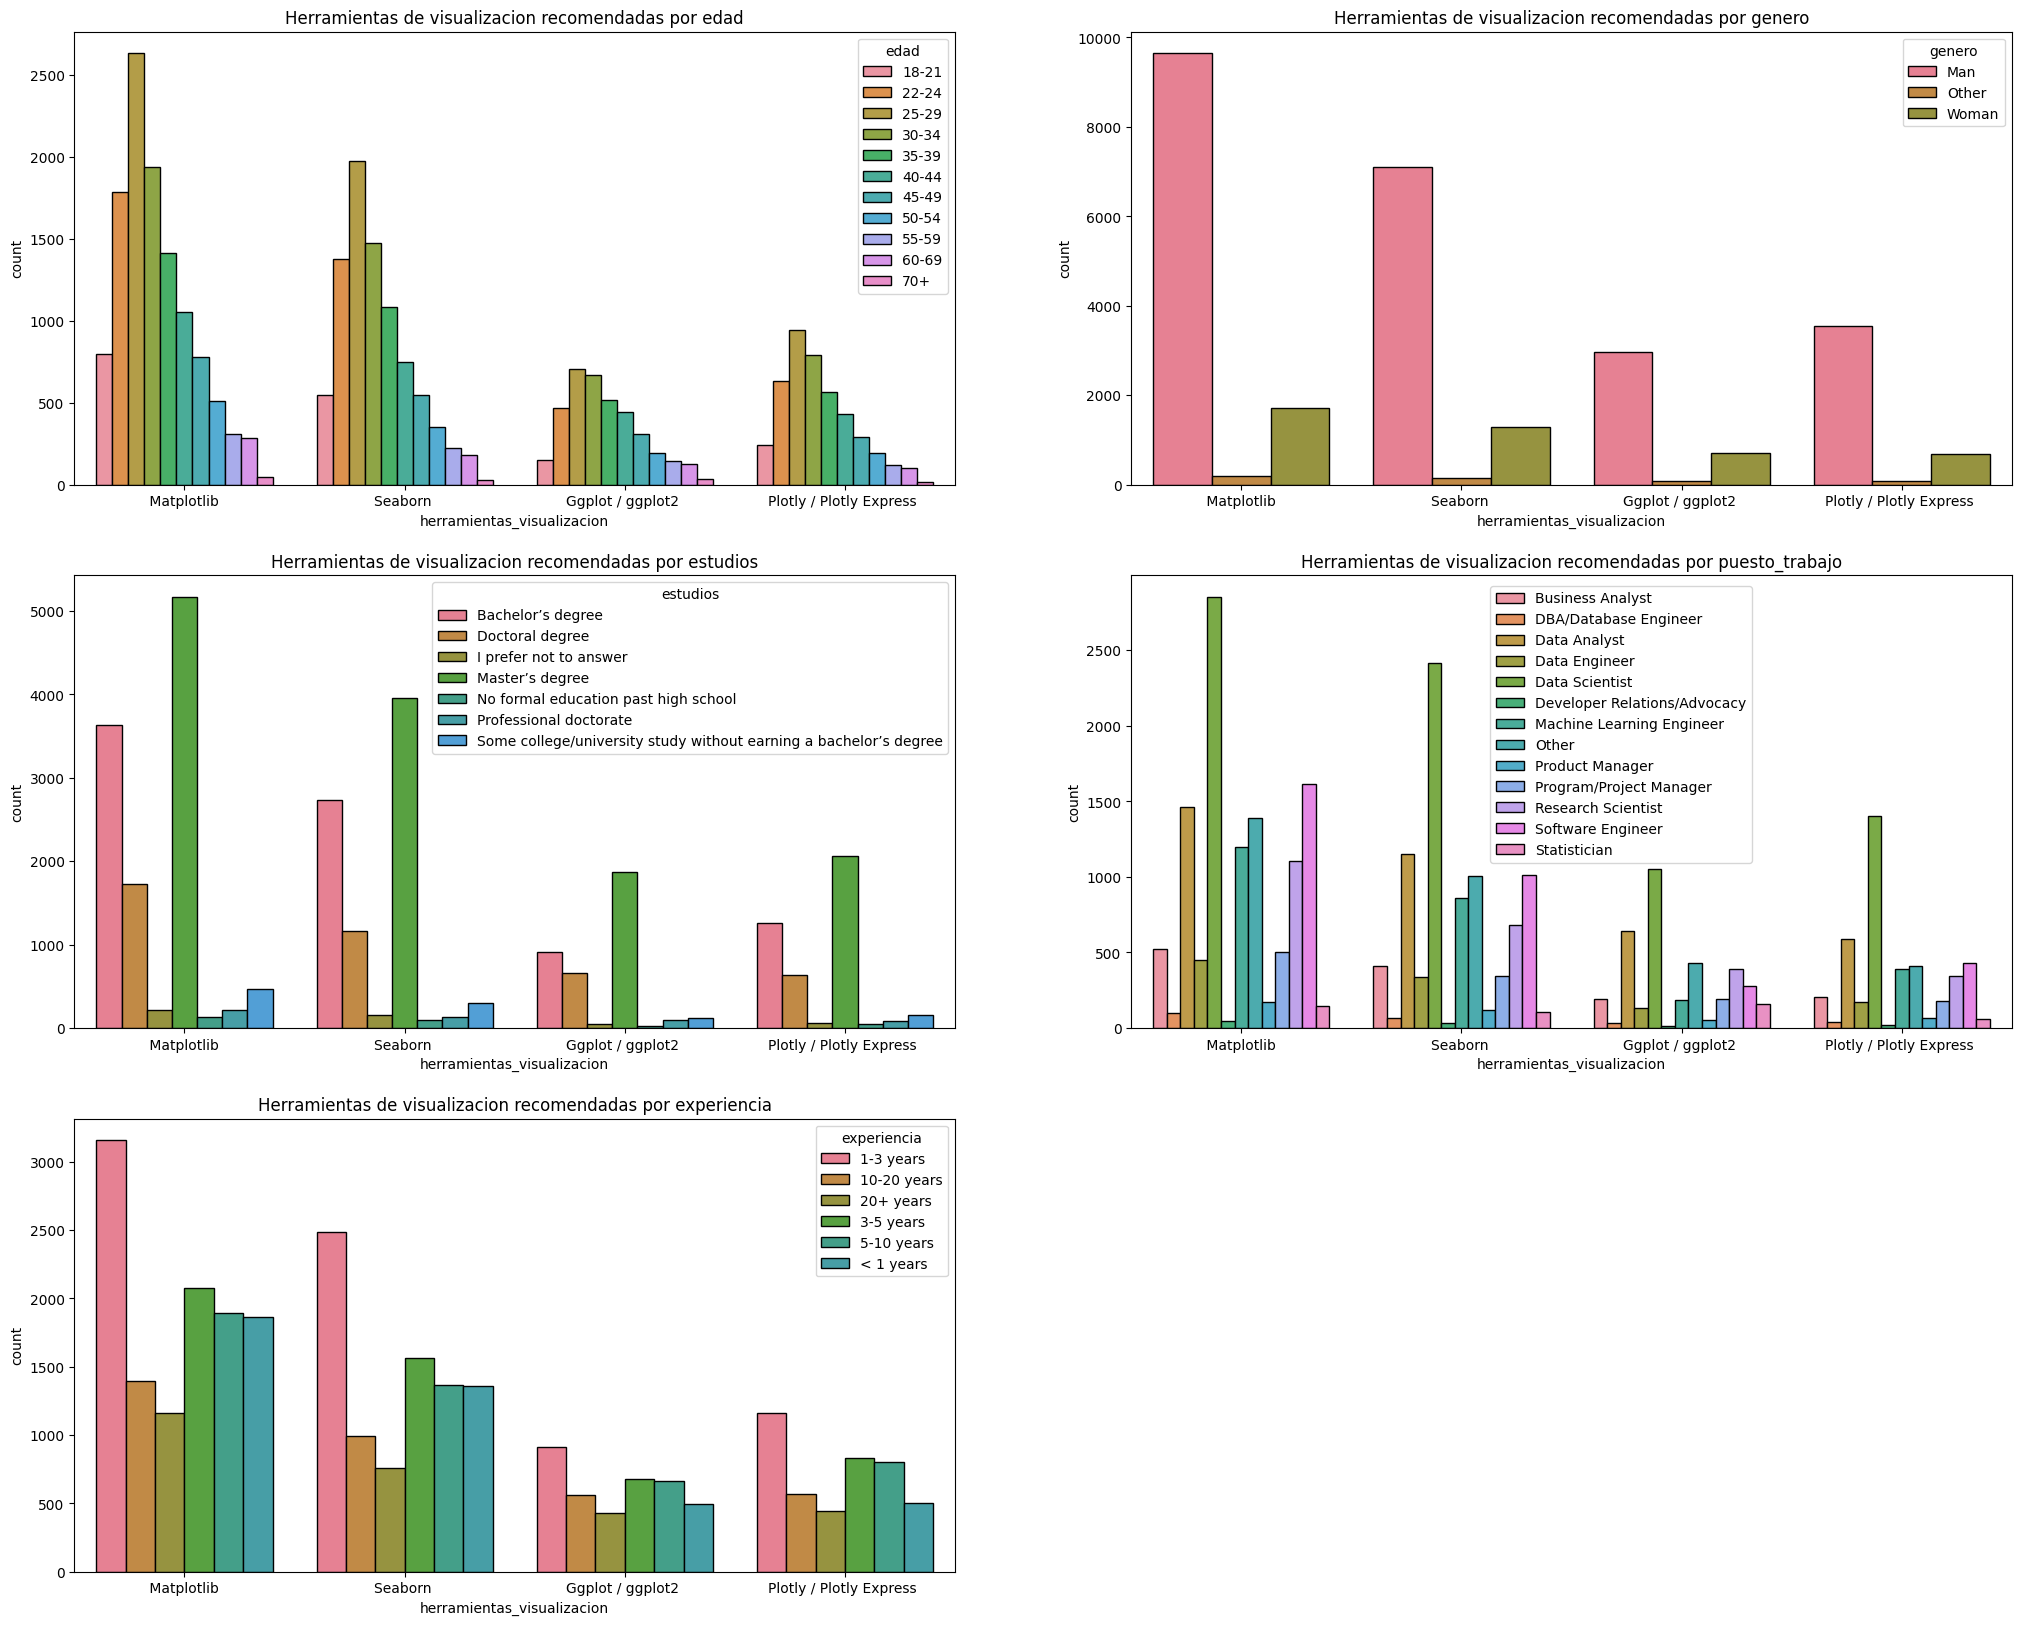

In [193]:
# Creamos un subplot con las gráficas de las herramientas de visualización por edad, genero, estudios, puesto de trabajo y experiencia
fig, axes = plt.subplots(3,2, figsize= (25,20))
axes = axes.flat
for indice, columna in enumerate(columnas_hue):
    sns.countplot(data = df_herramientas, x = "herramientas_visualizacion", hue= columna, ax = axes[indice], hue_order = df_herramientas.groupby(columna)["herramientas_visualizacion"].sum().index.tolist(),  edgecolor ='black')
    axes[indice].set_title(f"Herramientas de visualizacion recomendadas por {columna}")
axes[3].legend(bbox_to_anchor = (0.4,0.35))
fig.delaxes(axes[-1])
plt.show()

---
## LENGUAJES QUE RECOMIENDAN LOS USUARIOS
---

In [194]:
lista_ordenada_leng = df["lenguaje_recomendado"].value_counts().index.tolist()

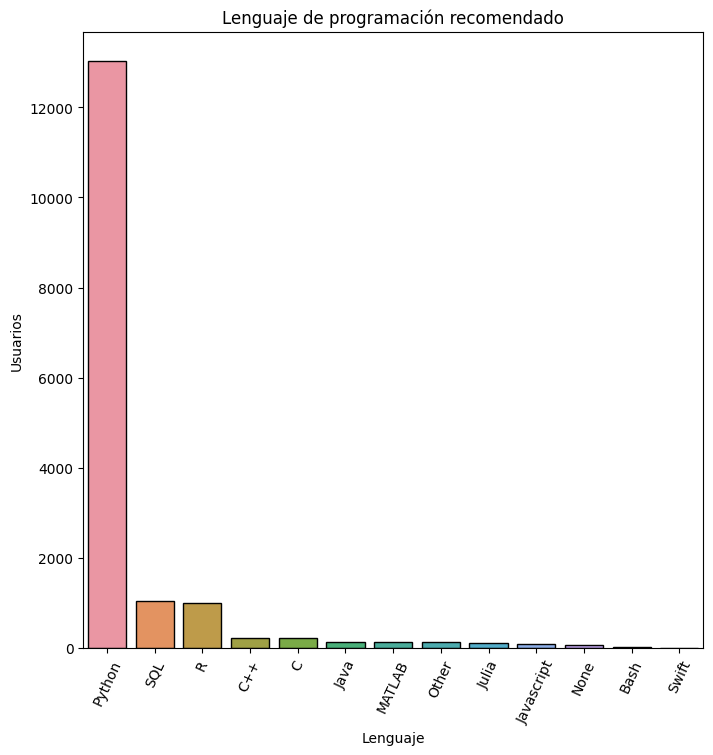

In [195]:
plt.figure(figsize =(8,8))
fig = sns.countplot(x= "lenguaje_recomendado", data= df, order= lista_ordenada_leng,  edgecolor ='black')
fig.set(xlabel='Lenguaje', ylabel = 'Usuarios')
plt.title(label = "Lenguaje de programación recomendado")
plt.xticks(rotation = 65)
plt.show()

In [196]:
list_leng = df["lenguaje_recomendado"].value_counts()[:3].index.tolist()

In [197]:
list_leng

['Python', 'SQL', 'R']

In [198]:
df_lenguaje = df.loc[df["lenguaje_recomendado"].isin(list_leng)]

In [199]:
df_lenguaje.head(2)

,edad,genero,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q28,q10_notebooks,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml,salario,edad_num
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,50.0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,"Kaggle Notebooks,Colab Notebooks",NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None,70000.0,50.0


In [200]:
df_lenguaje2 =df.stb.freq(["lenguaje_recomendado"], thresh= 93, other_label= "otros")

In [201]:
df_lenguaje2.head()

,lenguaje_recomendado,count,percent,cumulative_count,cumulative_percent
0,Python,13021,80.282385,13021,80.282385
1,SQL,1044,6.436895,14065,86.719280
2,R,1003,6.184105,15068,92.903385
3,otros,1151,7.096615,16219,100.000000


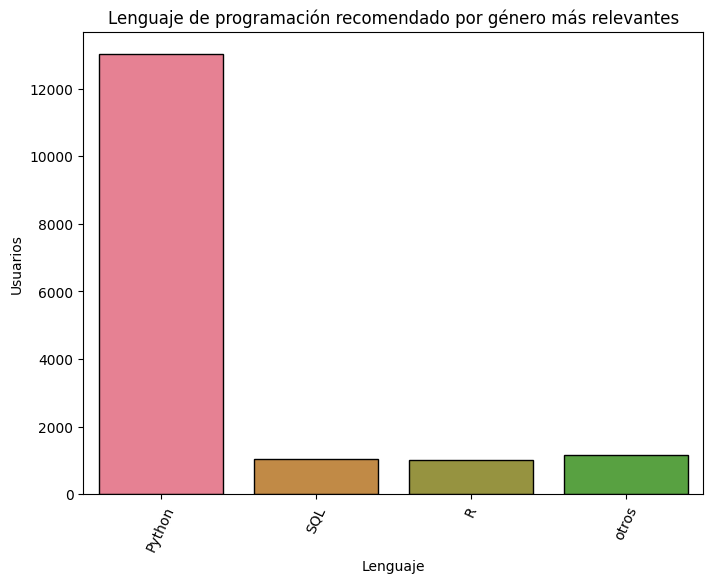

In [202]:
plt.figure(figsize =(8,6))
fig = sns.barplot(x= "lenguaje_recomendado", data= df_lenguaje2, y= "count", edgecolor ='black')
fig.set(xlabel='Lenguaje', ylabel = 'Usuarios')
plt.title(label = "Lenguaje de programación recomendado por género más relevantes")
plt.xticks(rotation = 65)
plt.show()

In [203]:
columnas_hue = ["edad", "genero", "estudios", "puesto_trabajo", "experiencia"]

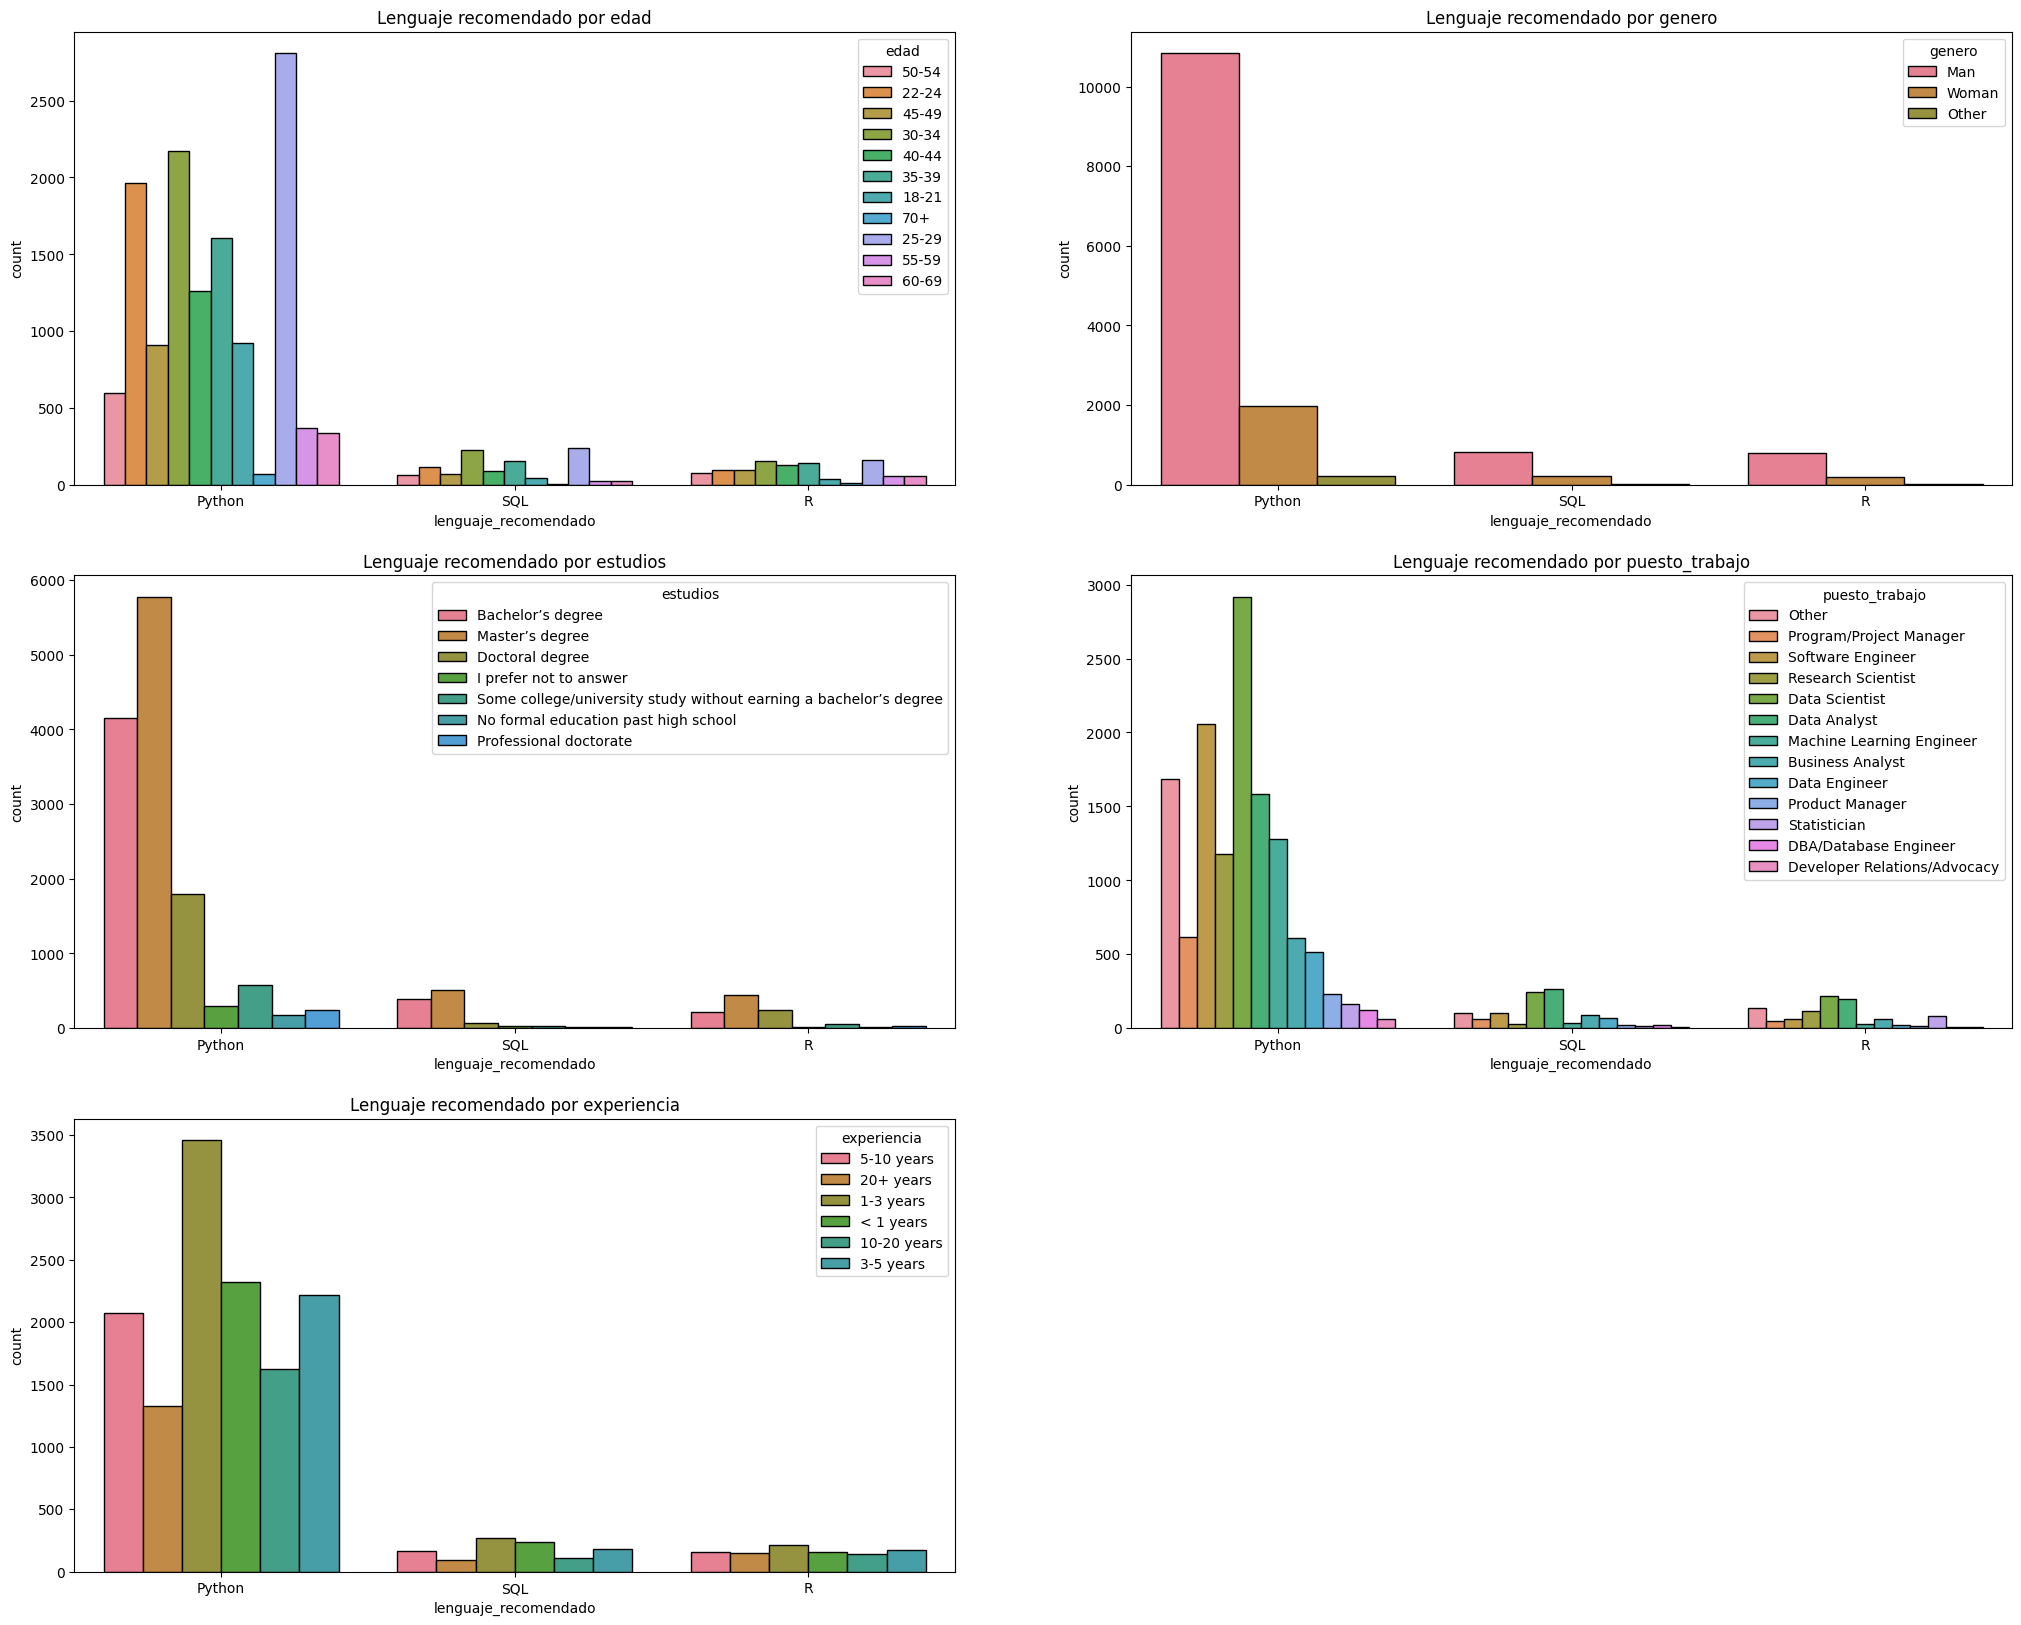

In [204]:
fig, axes = plt.subplots(3,2, figsize= (25,20))
axes = axes.flat
for indice, columna in enumerate(columnas_hue):
    sns.countplot(data = df_lenguaje, x = "lenguaje_recomendado", hue= columna, ax = axes[indice], edgecolor ='black')
    axes[indice].set_title(f"Lenguaje recomendado por {columna}")
fig.delaxes(axes[-1])
plt.show()

---

### PLATAFORMAS DE CLOUD COMPUTING MÁS USADAS

---

In [205]:
# Uso de la función
df_cloud = data_pregunta(df,"q27_plat_familiar_cloud_computing" )

/tmp/ipykernel_2966/4110717473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [206]:
df_cloud.head()

,edad,genero,pais,estudios,puesto_trabajo,experiencia,salario,q27_plat_familiar_cloud_computing
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,70000.0,Google Cloud Platform (GCP)
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,70000.0,Oracle Cloud
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,1000.0,Amazon Web Services (AWS)
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,1000.0,Google Cloud Platform (GCP)


In [207]:
# Creamos una lista para ordenar la gráfica por cantidad de votos
lista_2 = df_cloud["q27_plat_familiar_cloud_computing"].value_counts().index.tolist()

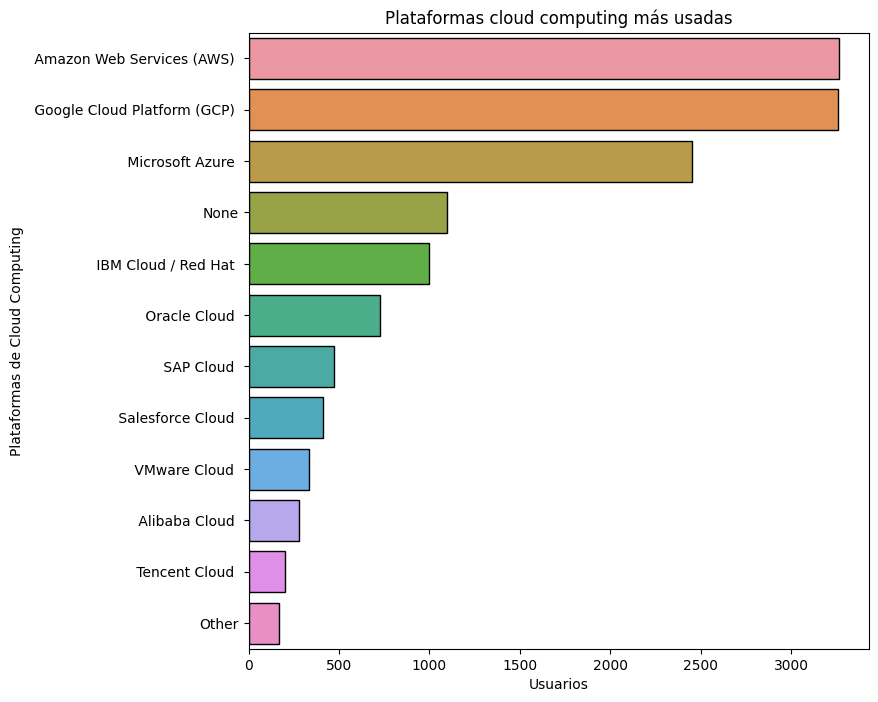

In [208]:
# Realizamos un countplot para visualizar las más usadas
plt.figure(figsize =(8,8))
fig = sns.countplot(y= "q27_plat_familiar_cloud_computing", data= df_cloud, order= lista_2, edgecolor ='black')
fig.set(xlabel='Usuarios', ylabel = 'Plataformas de Cloud Computing')
plt.title(label = "Plataformas cloud computing más usadas")
plt.show()

In [209]:
# Sacamos una lista con los 4 principales
list_cloud = df_cloud["q27_plat_familiar_cloud_computing"].value_counts()[:4].index.tolist()


In [210]:
# Creamos un df filtrando por la lista con los más habituales
df_cloud_4 = df_cloud.loc[df_cloud["q27_plat_familiar_cloud_computing"].isin(list_cloud)]

In [211]:
df_cloud_4['q27_plat_familiar_cloud_computing'].value_counts()

 Amazon Web Services (AWS)       3263
 Google Cloud Platform (GCP)     3255
 Microsoft Azure                 2450
None                             1095
Name: q27_plat_familiar_cloud_computing, dtype: int64

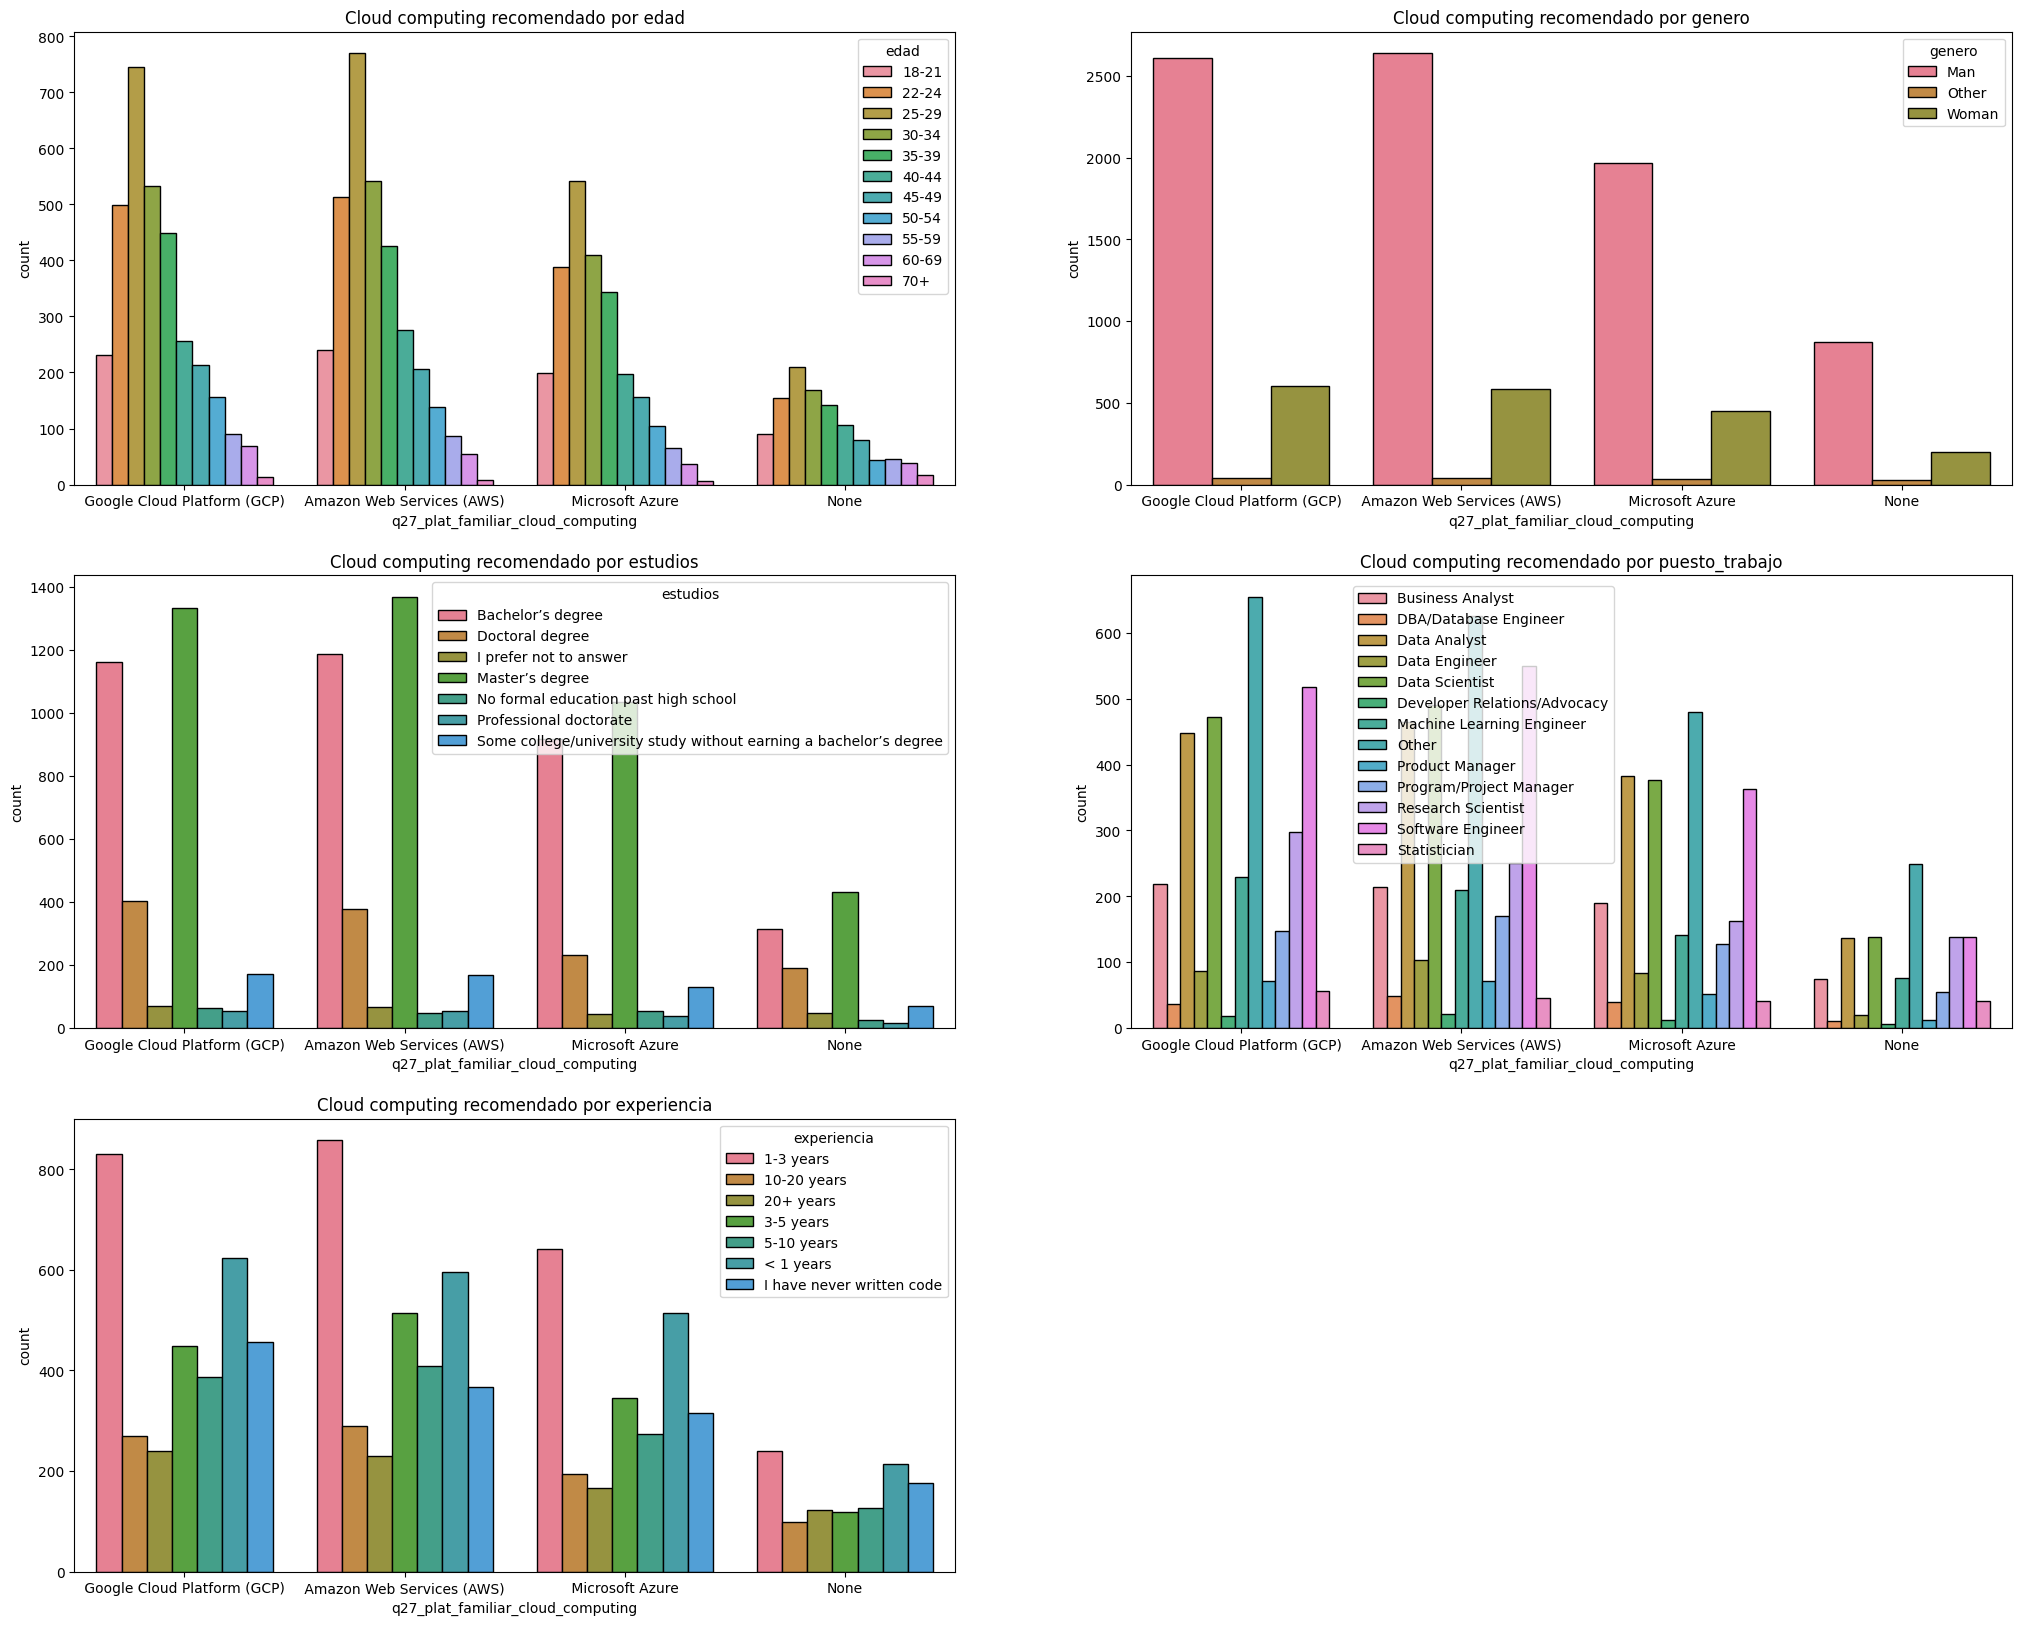

In [212]:
# Creamos un subplot con las gráficas por edad, genero, estudios, puesto de trabajo y experiencia
fig, axes = plt.subplots(3,2, figsize= (25,20))
axes = axes.flat
for indice, columna in enumerate(columnas_hue):
    sns.countplot(data = df_cloud_4, x = "q27_plat_familiar_cloud_computing", hue= columna, ax = axes[indice], hue_order = df_cloud_4.groupby(columna)["q27_plat_familiar_cloud_computing"].sum().index.tolist(), edgecolor ='black')
    axes[indice].set_title(f"Cloud computing recomendado por {columna}")
axes[3].legend(bbox_to_anchor = (0.4,0.35))
fig.delaxes(axes[-1])
plt.show()

---

### PLATAFORMAS DE CURSOS MÁS USADAS #duplicado con el trabajo de Lola, se puede borrar o como tiene el gitdrama lo mismo así ya está aquí el código

---

In [213]:
# Uso de la función
df_cursos = data_pregunta(df,"q40_plat_cursos")

/tmp/ipykernel_2966/4110717473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [214]:
df_cursos.head()

,edad,genero,pais,estudios,puesto_trabajo,experiencia,salario,q40_plat_cursos
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Coursera
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,edX
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Kaggle Learn Courses
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,DataCamp
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Udacity


In [215]:
# Creamos una lista para ordenar la gráfica por cantidad de votos
lista_3 = df_cursos["q40_plat_cursos"].value_counts().index.tolist()

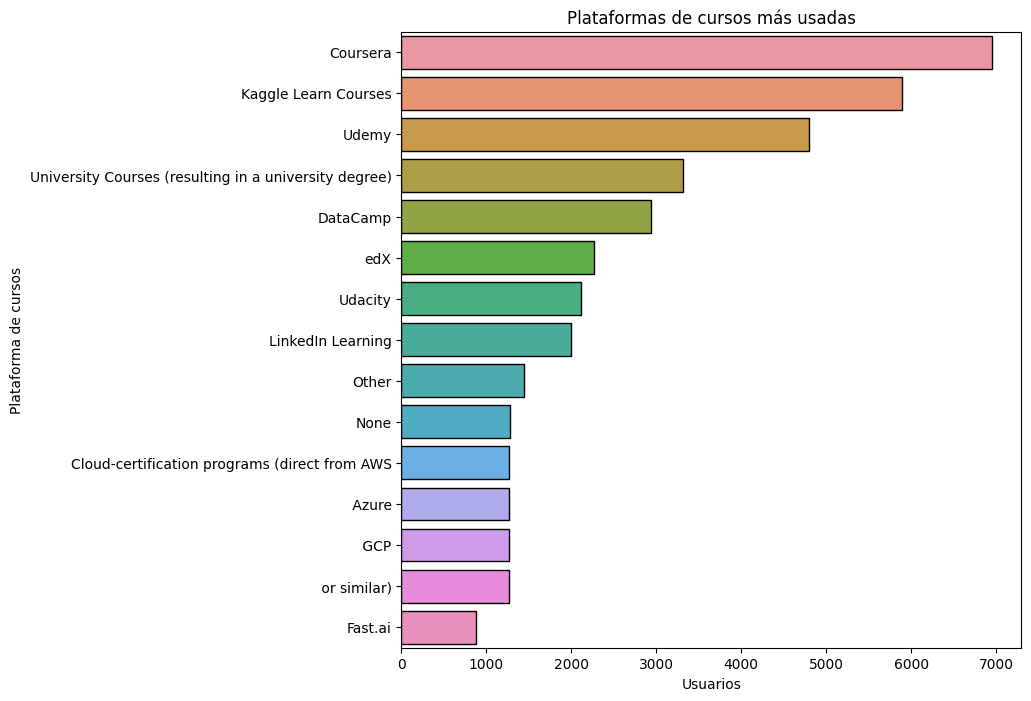

In [216]:
# Realizamos un countplot para visualizar las más usadas
plt.figure(figsize =(8,8))
fig = sns.countplot(y= "q40_plat_cursos", data= df_cursos, order= lista_3, edgecolor ='black')
fig.set(xlabel='Usuarios', ylabel = 'Plataforma de cursos')
plt.title(label = "Plataformas de cursos más usadas")
plt.show()

---

### PROGRAMAS DE BIG DATA MÁS USADOS

---

In [217]:
# Uso de la función
df_bigdata= data_pregunta(df, 'Q32_prod_bigdata')

/tmp/ipykernel_2966/4110717473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


In [218]:
df_bigdata.head()

,edad,genero,pais,estudios,puesto_trabajo,experiencia,salario,Q32_prod_bigdata
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,PostgreSQL
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,70000.0,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,1000.0,MySQL
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,1000.0,MongoDB
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,40000.0,NaN


In [219]:
# Creamos una lista para ordenar la gráfica por cantidad de votos
lista_4 = df_bigdata["Q32_prod_bigdata"].value_counts().index.tolist()

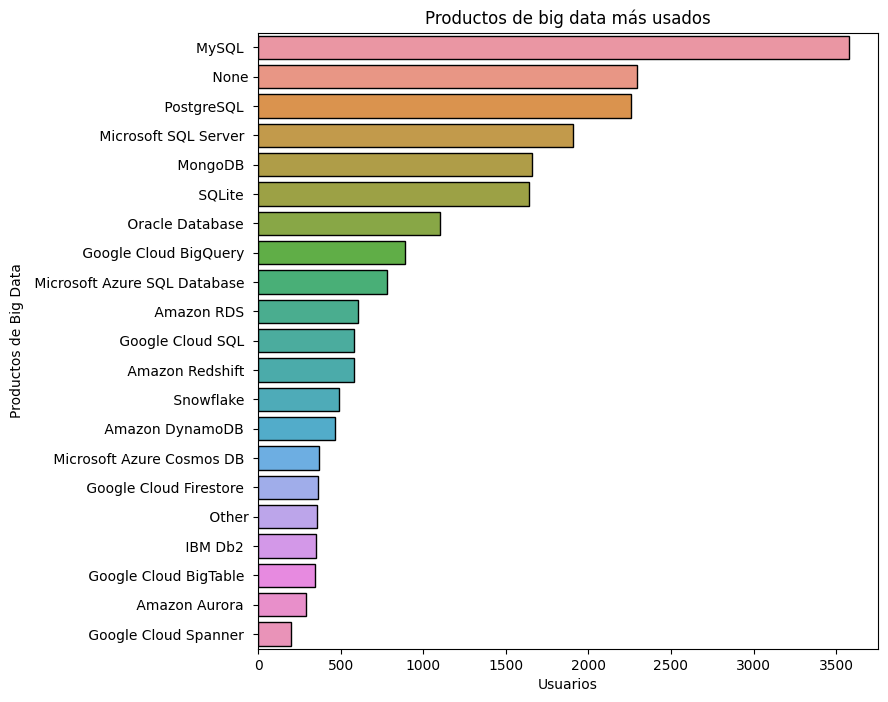

In [220]:
# Realizamos un countplot para visualizar las más usadas
plt.figure(figsize =(8,8))
fig = sns.countplot(y= "Q32_prod_bigdata", data= df_bigdata, order= lista_4,  edgecolor ='black')
fig.set(xlabel='Usuarios', ylabel = 'Productos de Big Data')
plt.title(label = "Productos de big data más usados")
plt.show()

---

Idea inicial de Clase 1:

class proceso_analisis_columna():

def abrir archivo y comprobar los valores de las columnas (tipo de dato,nulos...)

def aplicar función data_pregunta (split,expand,nuevo df)

def crear gráfica de la pregunta con el total
    
def crear gráfica con los 4-5 con más cantidad (nuevo df solo con 4, stb.freq, thresh)

def crear subplot con la pregunta y diferentes hue (nuevo df solo con 4, paleta de colores, colocar leyendas fuera de la gráfica?)



    